<a href="https://colab.research.google.com/github/Sohail1173/Cifar10-dataset/blob/main/Cifar10_dataset_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
Here we will train a CNN to classify images from the CIFAR-10 dataset.
1. Load CIFAR-10 Database

In [87]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

2. Visualize the First 24 Training Images

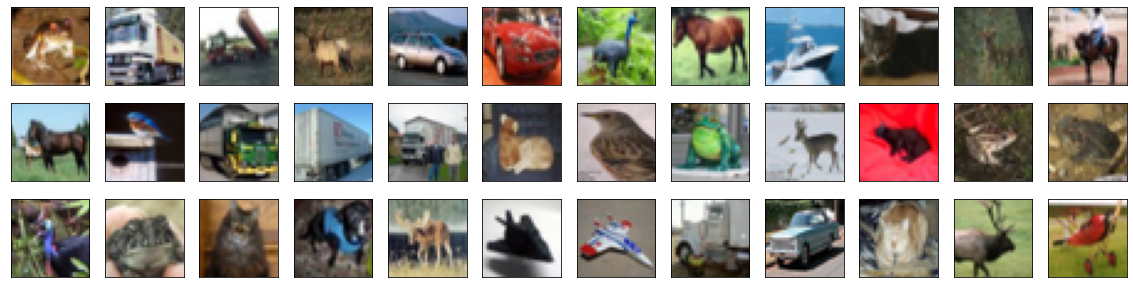

In [88]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

3. Rescale the Images by Dividing Every Pixel in Every Image by 255
In fact, the cost function has the shape of a bowl, but it can be an elongated bowl if the features have very different scales. Figure below shows Gradient Descent on a training set where features 1 and 2 have the same scale (on the left), and on a training set where feature 1 has much smaller values than feature 2 (on the right).

** Tip: ** When using Gradient Descent, you should ensure that all features have a similar scale to speed up training or else it will take much longer to converge.

In [89]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


2. Visualize the First 24 Training Images

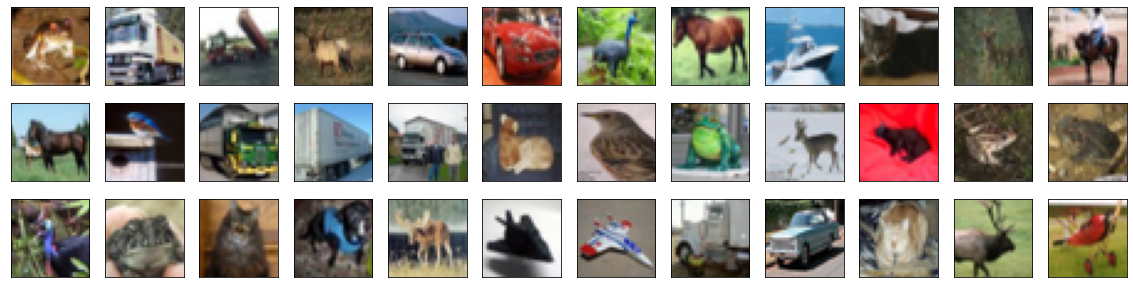

In [90]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

3. Rescale the Images by Dividing Every Pixel in Every Image by 255
In fact, the cost function has the shape of a bowl, but it can be an elongated bowl if the features have very different scales. Figure below shows Gradient Descent on a training set where features 1 and 2 have the same scale (on the left), and on a training set where feature 1 has much smaller values than feature 2 (on the right).

** Tip: ** When using Gradient Descent, you should ensure that all features have a similar scale to speed up training or else it will take much longer to converge.

In [91]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255


4. Break Dataset into Training, Testing, and Validation Sets

In [92]:

from keras.utils import np_utils
from tensorflow import keras

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


5. Define the Model Architecture


In [93]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=12, kernel_size=3,strides=1,kernel_initializer='he_uniform', padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=24, kernel_size=3,strides=1,kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=36, kernel_size=3,strides=1, kernel_initializer='he_uniform',padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 32, 32, 12)        336       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 16, 16, 12)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 16, 16, 24)        2616      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 8, 8, 24)         0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 8, 8, 36)          7812      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 4, 4, 36)        

6. Compile the Model


In [95]:

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

7. Train the Model

In [96]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)

hist = model.fit(x_train, y_train, batch_size=32, epochs=50,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Epoch 1/50

Epoch 1: val_loss improved from inf to 1.30086, saving model to model.weights.best.hdf5
1407/1407 - 6s - loss: 1.5729 - accuracy: 0.4283 - val_loss: 1.3009 - val_accuracy: 0.5452 - 6s/epoch - 5ms/step
Epoch 2/50

Epoch 2: val_loss improved from 1.30086 to 1.12396, saving model to model.weights.best.hdf5
1407/1407 - 6s - loss: 1.2541 - accuracy: 0.5499 - val_loss: 1.1240 - val_accuracy: 0.6012 - 6s/epoch - 4ms/step
Epoch 3/50

Epoch 3: val_loss improved from 1.12396 to 1.02373, saving model to model.weights.best.hdf5
1407/1407 - 5s - loss: 1.1352 - accuracy: 0.5980 - val_loss: 1.0237 - val_accuracy: 0.6426 - 5s/epoch - 4ms/step
Epoch 4/50

Epoch 4: val_loss improved from 1.02373 to 0.97452, saving model to model.weights.best.hdf5
1407/1407 - 5s - loss: 1.0574 - accuracy: 0.6226 - val_loss: 0.9745 - val_accuracy: 0.6564 - 5s/epoch - 4ms/step
Epoch 5/50

Epoch 5: val_loss improved from 0.97452 to 0.90795, saving model to model.weights.best.hdf5
1407/1407 - 5s - loss: 0.9916 - 

8. Load the Model with the Best Validation Accuracy

In [97]:

model.load_weights('model.weights.best.hdf5')


9. Visualize Some Predictions

313/313 [==============================] - 1s 2ms/step


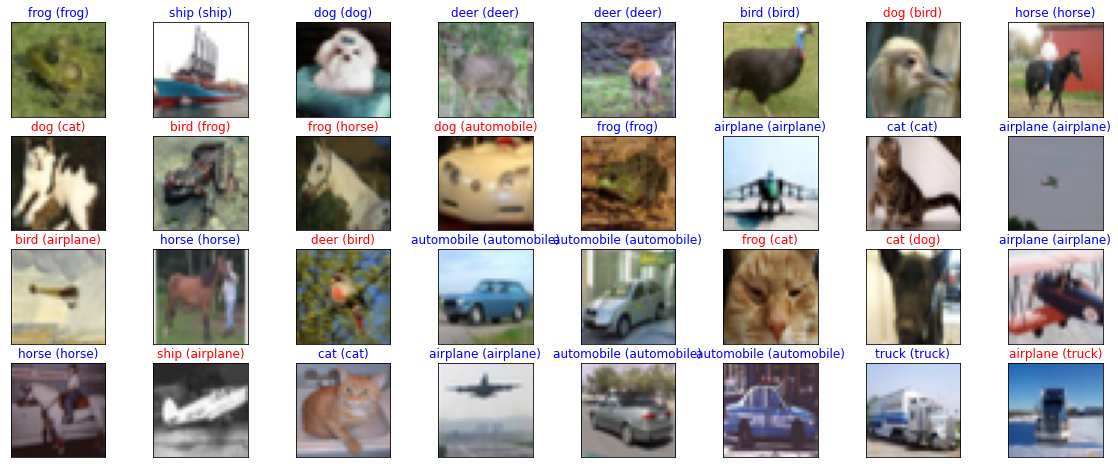

In [98]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))